# Problem Statement
To provide solution to the manager of a credit card company to reduce the churn rate by at least 16%  

# Solution
1) To study the factors influencing the customer churn.

2) Build a propensity model to estimate likelihood of customer churn

3) Build retention strategies for different cohorts of customers.  

### Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from collections import Counter
from sklearn.linear_model import LogisticRegression

## Exploring the data

 Extracting relevant data 

In [2]:

df = pd.read_csv('BankChurners.csv')
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis = 1, inplace = True)
cols = df.columns
descriptions = ["Client number. Unique identifier for the customer holding the account","Internal event (customer activity) variable - if the account is closed then 1 else 0","Demographic variable - Customer's Age in Years","Demographic variable - M=Male, F=Female","Demographic variable - Number of dependents","Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)","Demographic variable - Married, Single, Divorced, Unknown","Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >","Product Variable - Type of Card (Blue, Silver, Gold, Platinum)","Period of relationship with bank","Total no. of products held by the customer","No. of months inactive in the last 12 months","No. of Contacts in the last 12 months","Credit Limit on the Credit Card","Total unpaid balance getting carried over to next month","Difference between credit limit and total balance available (Average of last 12 months)","Change in Transaction Amount (Q4 over Q1)","Total Transaction Amount (Last 12 months)","Total Transaction Count (Last 12 months)","Change in Transaction Count (Q4 over Q1)","The percentage of a borrower’s total available credit that is currently being utilized."]
# df.set_index(['CLIENTNUM'],inplace = True)
info = pd.DataFrame({'columns':cols,'description':descriptions})
info


,columns,description
0,CLIENTNUM,Client number. Unique identifier for the custo...
1,Attrition_Flag,Internal event (customer activity) variable - ...
2,Customer_Age,Demographic variable - Customer's Age in Years
3,Gender,"Demographic variable - M=Male, F=Female"
4,Dependent_count,Demographic variable - Number of dependents
5,Education_Level,Demographic variable - Educational Qualificati...
6,Marital_Status,"Demographic variable - Married, Single, Divorc..."
7,Income_Category,Demographic variable - Annual Income Category ...
8,Card_Category,"Product Variable - Type of Card (Blue, Silver,..."
9,Months_on_book,Period of relationship with bank


In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


-We have 10,127 customers data who range between 26 to 73 years old, with 2 dependents on an average.

-These customers have a relationship with the bank for more than a year, with the maximum of 4.8 years.

-More than 75% of the customers have at least 5 products of the bank

-There are Customers who have been inactive with the bank for a maximum of 6 months in the past 12 months.

-Range of customers' credit limit is between USD1438.3 - USD34516 


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are no null values in the dataset

In [6]:
for c in df.select_dtypes('object').columns:
    print(df[c].value_counts())
    print("-------------------------")

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
-------------------------
F    5358
M    4769
Name: Gender, dtype: int64
-------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
-------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
-------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
-------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
-------------------------


# Insights

## Visualize the categorical variables wrt Attrition

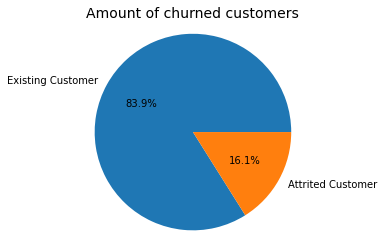

In [7]:
target = df["Attrition_Flag"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

1 among six customers have been churned

## Attrition flag wrt Gender

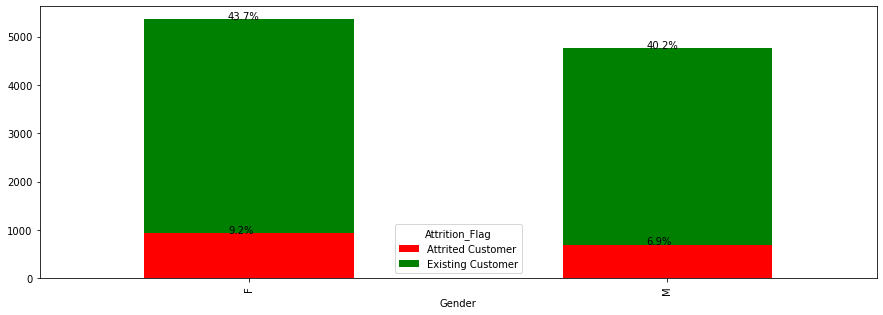

In [8]:
dftemp1 = pd.crosstab(df['Gender'],df['Attrition_Flag'])
total = len(df['Gender'])
ax = dftemp1.plot(kind = 'bar',stacked = True,color = ['red','green'],figsize = (15,5))

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2-0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
plt.savefig('AttritionWrtGender.png',bbox_inches = 'tight')

In [9]:
dftemp1

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,930,4428
M,697,4072


There are more women customers than men and 83.9% of the customers are still with the bank.

## Income categories

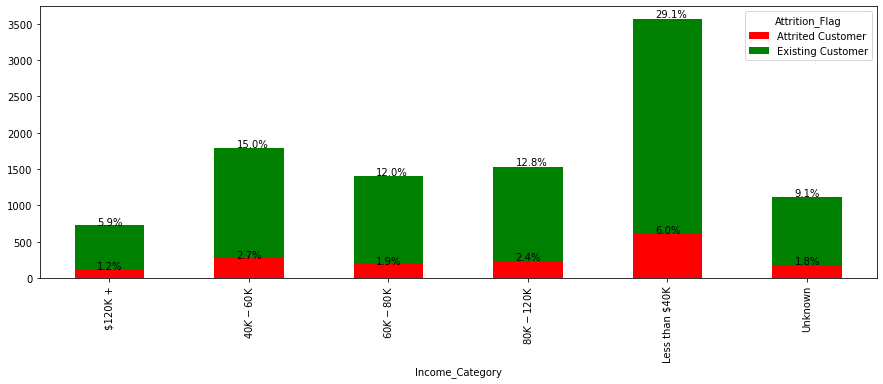

In [10]:
dftemp2 = pd.crosstab(df['Income_Category'],df['Attrition_Flag'])
totalIC = len(df['Income_Category'])

ax2 = dftemp2.plot(kind = 'bar',stacked = True,color = ['red','green'],figsize = (15,5))
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalIC)
    x = p.get_x() + p.get_width() / 2-0.09
    y = p.get_y() + p.get_height()*1.01 
    ax2.annotate(percentage, (x, y))



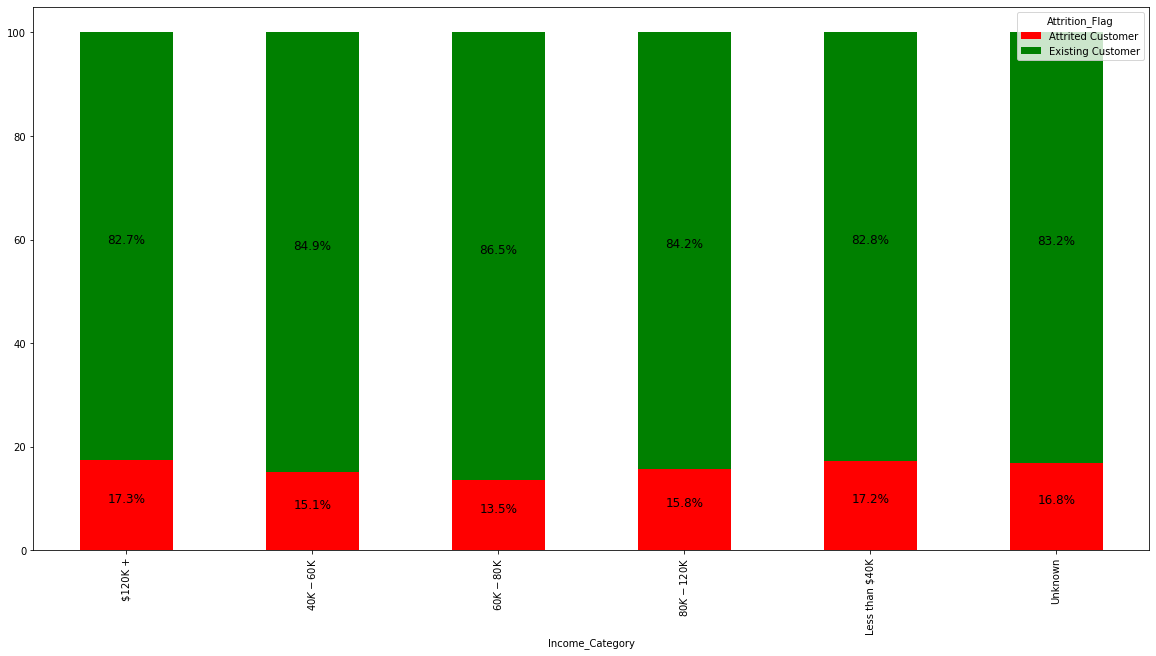

In [11]:
dftemp2 = pd.crosstab(df['Income_Category'],df['Attrition_Flag']).apply(lambda r:r/r.sum()*100,axis=1)
# totalIC = len(df['Income_Category'])

ax2 = dftemp2.plot(kind = 'bar',stacked = True,color = ['red','green'],figsize = (20,10))
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2, 
              p.get_y() + height / 2,
              "{:.1f}%".format(height),
              ha='center', 
              va='bottom',
            fontsize = 12)


In [12]:
dftemp2

Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,17.331499,82.668501
$40K - $60K,15.139665,84.860335
$60K - $80K,13.480742,86.519258
$80K - $120K,15.765472,84.234528
Less than $40K,17.186184,82.813816
Unknown,16.816547,83.183453


- 6\% of the customers earn less than 40k USD followed by customers earning between 40k-60k USD and 80k-120k USD 

## Customers' age

<AxesSubplot:xlabel='Customer_Age', ylabel='count'>

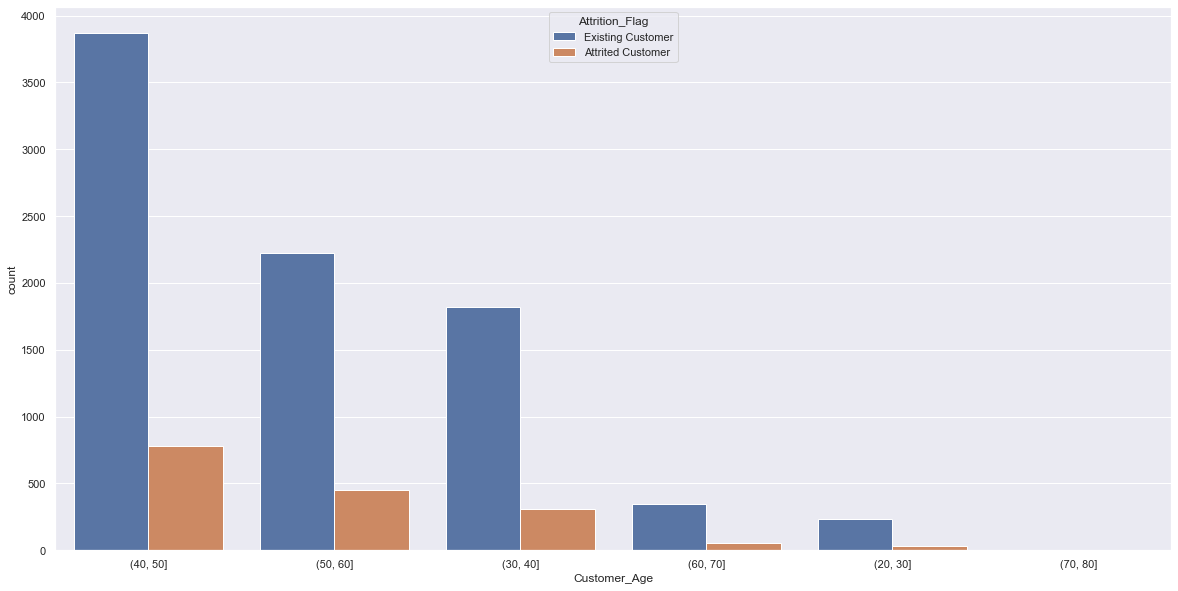

In [13]:
agegroups= pd.cut(df['Customer_Age'],bins = [20,30,40,50,60,70,80])
# print(agegroups.value_counts())
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x=agegroups,hue = 'Attrition_Flag',order = agegroups.value_counts().index,data = df)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

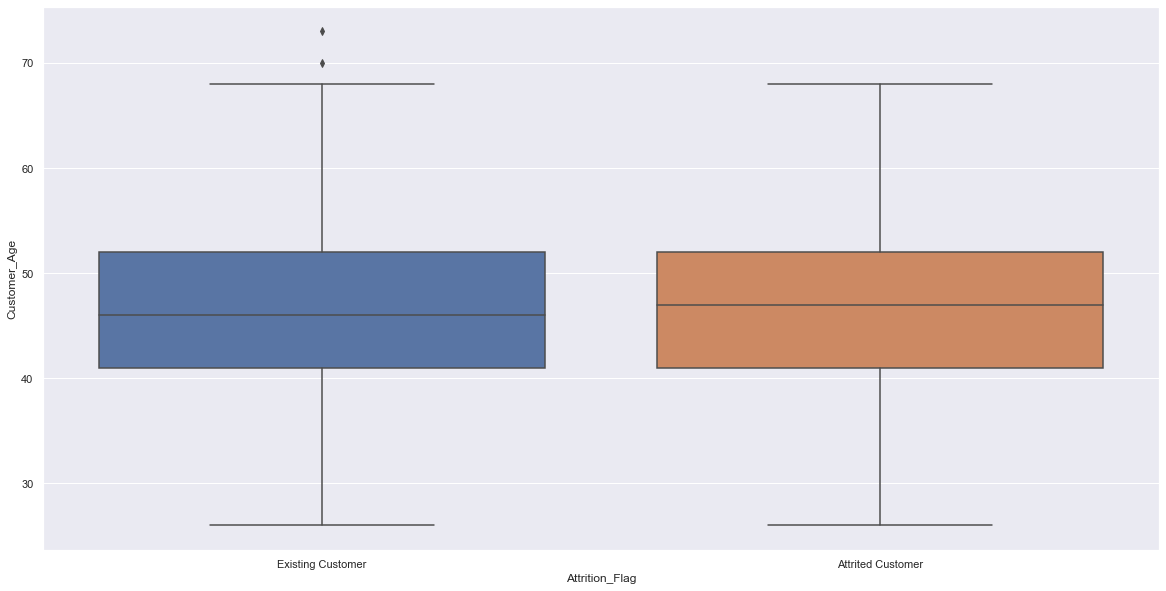

In [14]:
sns.boxplot(data = df,x = 'Attrition_Flag',y = 'Customer_Age')

The data shows that most of the customers are 40-60 years of age and have similar distribution with respect to attrition with few outliers in the group 'Existing customers'

# Marital status

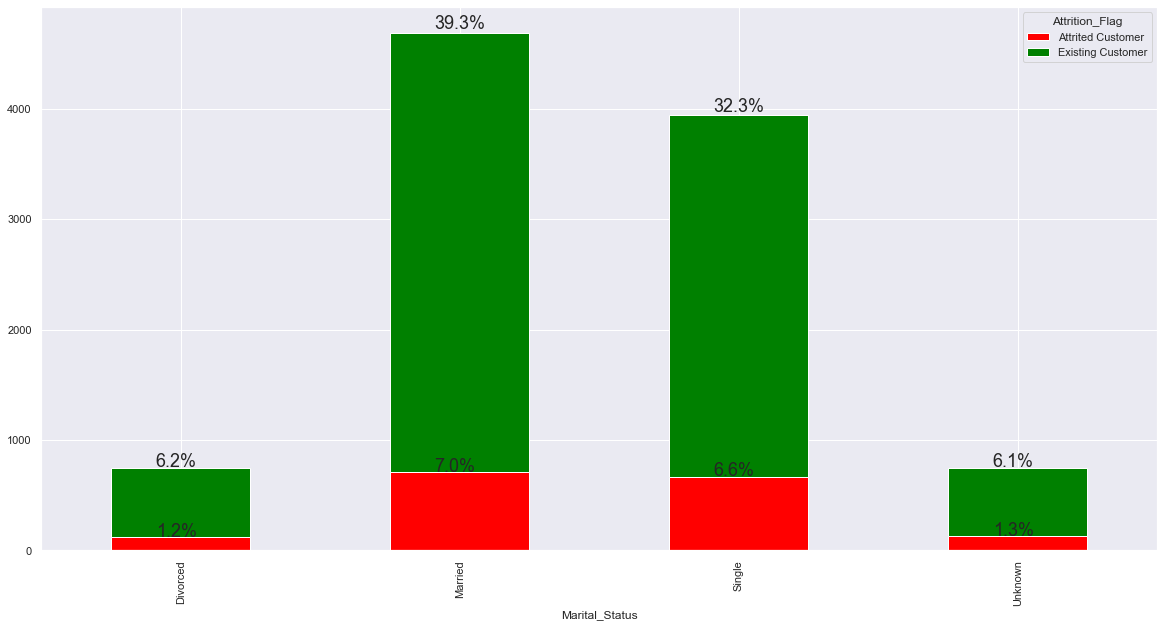

In [15]:
dfMarital = pd.crosstab(df['Marital_Status'],df['Attrition_Flag'])
totalMS = len(df['Marital_Status'])

ax3 = dfMarital.plot(kind = 'bar',stacked = True,color = ['red','green'])
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalMS)
    x = p.get_x() + p.get_width() / 2 - 0.09
    y = p.get_y() + p.get_height()*1.01 
    ax3.annotate(percentage, (x, y), size = 18)

plt.savefig('MaritalStatus_Attrition.png')

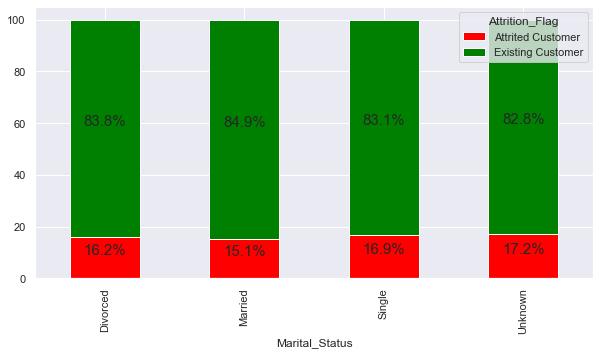

In [16]:
dfMarital = pd.crosstab(df['Marital_Status'],df['Attrition_Flag']).apply(lambda r:r/r.sum()*100,axis=1)
ax = dfMarital.plot(kind = 'bar',stacked = True,color = ['red','green'],figsize = (10,5))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, 
              p.get_y() + height / 2,
              "{:.1f}%".format(height),
              ha='center', 
              va='bottom',
           fontsize = 15)

In [17]:
dfMarital

Attrition_Flag,Attrited Customer,Existing Customer
Marital_Status,,
Divorced,16.176471,83.823529
Married,15.126947,84.873053
Single,16.941415,83.058585
Unknown,17.222964,82.777036


The data shows that majority of the customers ˜46% are married followed by customers who are single.


# Education level

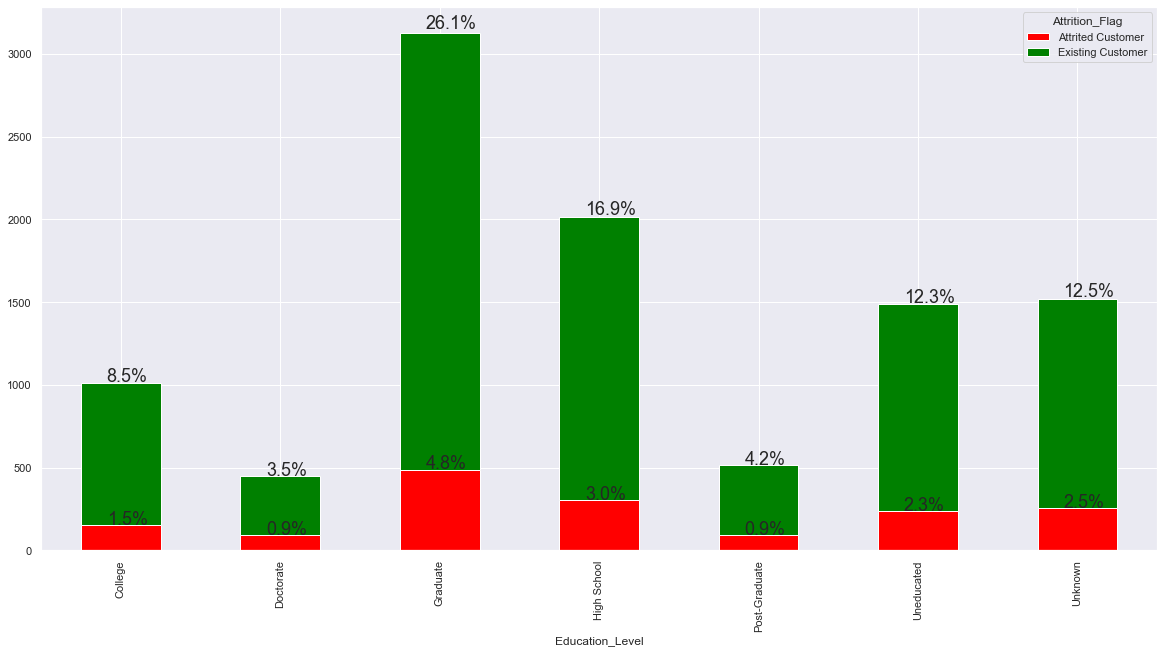

In [18]:
dfEducation = pd.crosstab(df['Education_Level'],df['Attrition_Flag'])
totalEL = len(df['Education_Level'])

ax4 = dfEducation.plot(kind = 'bar',stacked = True,color = ['red','green'])
for p in ax4.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalIC)
    x = p.get_x() + p.get_width() / 2 - 0.09
    y = p.get_y() + p.get_height()*1.01 
    ax4.annotate(percentage, (x, y), size = 18)

plt.savefig('EducationLevel_Attrition.png')

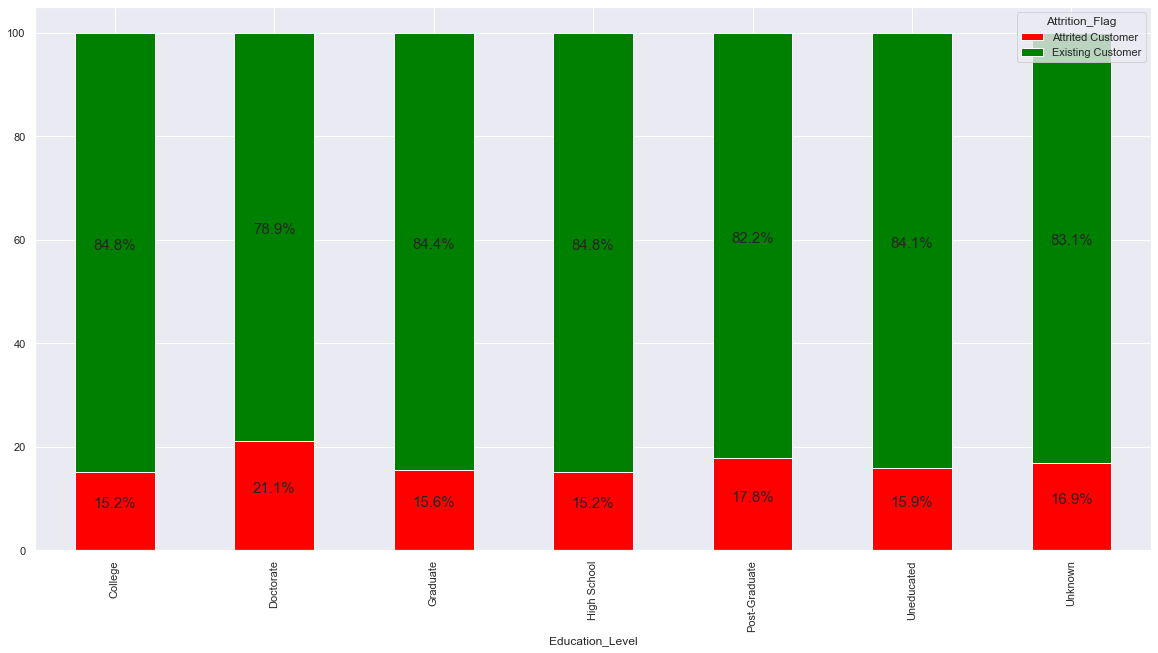

In [19]:
dfEducation = pd.crosstab(df['Education_Level'],df['Attrition_Flag']).apply(lambda r:r/r.sum()*100,axis=1)
ax = dfEducation.plot(kind = 'bar',stacked = True,color = ['red','green'],width = 0.5)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, 
              p.get_y() + height / 2,
              "{:.1f}%".format(height),
              ha='center', 
              va='bottom',
               fontsize = 15)

In [20]:
dfEducation

Attrition_Flag,Attrited Customer,Existing Customer
Education_Level,,
College,15.202369,84.797631
Doctorate,21.064302,78.935698
Graduate,15.569054,84.430946
High School,15.201192,84.798808
Post-Graduate,17.829457,82.170543
Uneducated,15.938130,84.061870
Unknown,16.853193,83.146807


Majority i.e 30.9% of the total customers were graduates amongst which 4.8% were churned

## Card Category

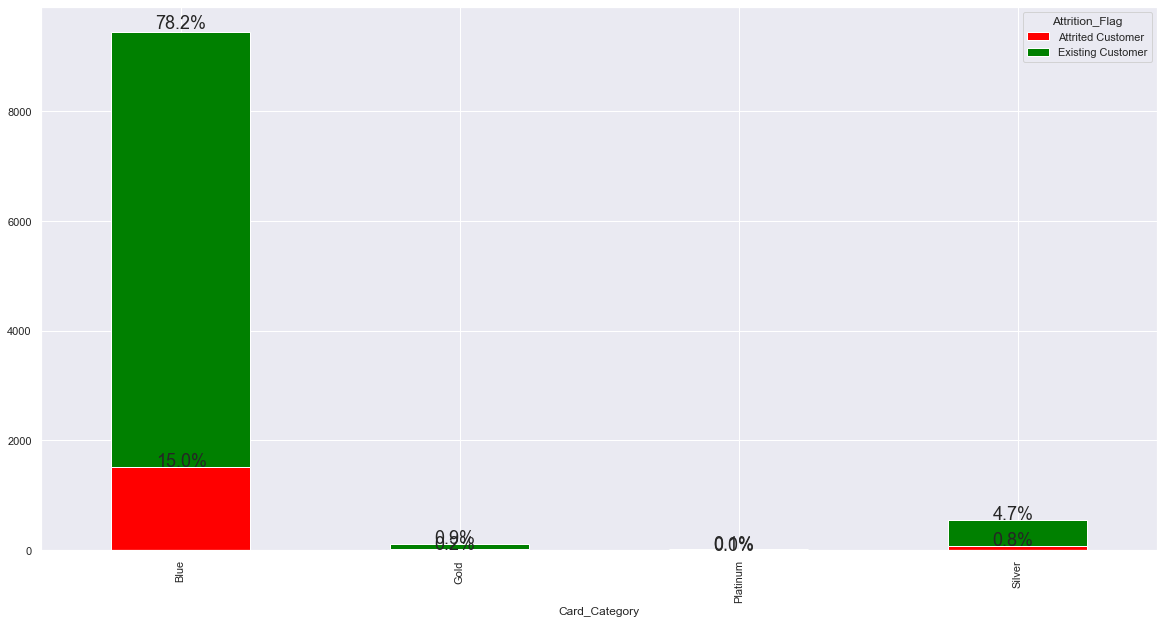

In [21]:
dfCardCat = pd.crosstab(df['Card_Category'],df['Attrition_Flag'])
totalCC = len(df['Card_Category'])

ax4 = dfCardCat.plot(kind = 'bar',stacked = True,color = ['red','green'])
for p in ax4.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalIC)
    x = p.get_x() + p.get_width() / 2 - 0.09
    y = p.get_y() + p.get_height()*1.01 
    ax4.annotate(percentage, (x, y), size = 18)


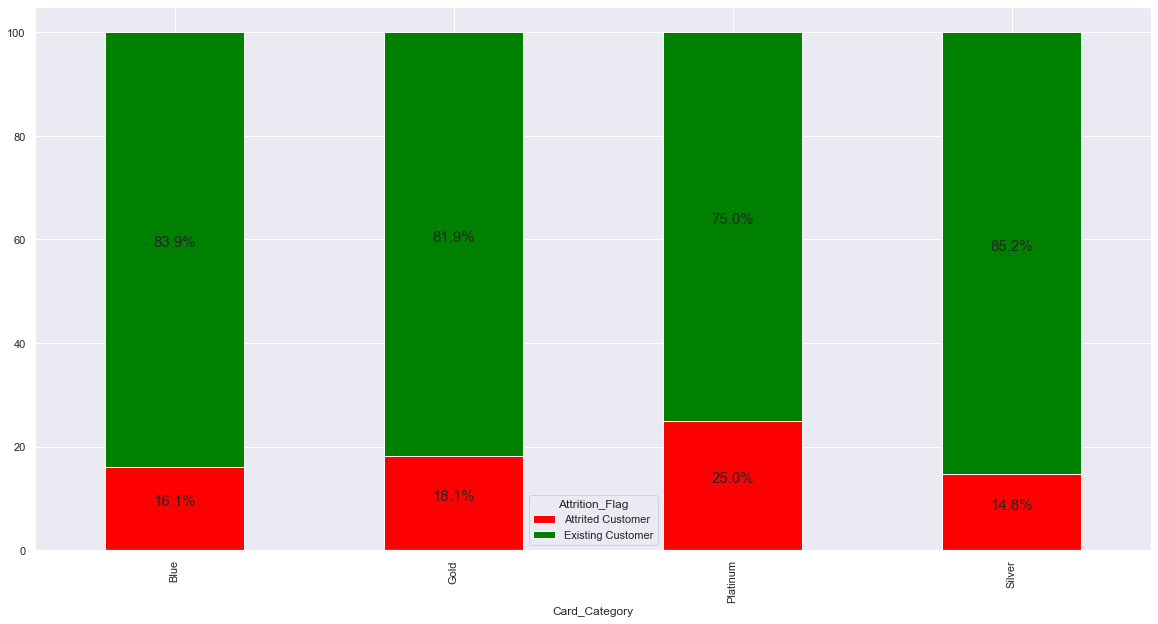

In [22]:
dfCardCat = pd.crosstab(df['Card_Category'],df['Attrition_Flag']).apply(lambda r:r/r.sum()*100,axis=1)
ax5 = dfCardCat.plot(kind = 'bar',stacked = True,color = ['red','green'],width = 0.5)
for p in ax5.patches:
    height = p.get_height()
    ax5.text(p.get_x() + p.get_width() / 2, 
              p.get_y() + height / 2,
              "{:.1f}%".format(height),
              ha='center', 
              va='bottom',
               fontsize = 15)

In [23]:
dfCardCat

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,16.097923,83.902077
Gold,18.103448,81.896552
Platinum,25.000000,75.000000
Silver,14.774775,85.225225


Almost 80% of the customers have the Blue card and for every 4 Platinum customers, 1 would get churned. 

<AxesSubplot:xlabel='Months_on_book', ylabel='Total_Trans_Ct'>

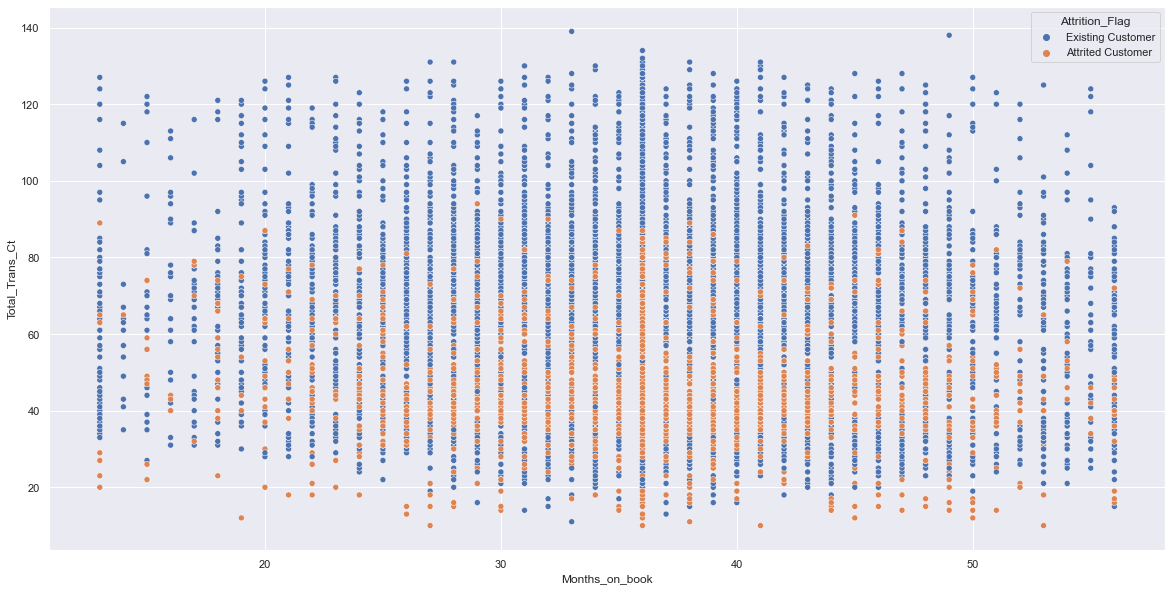

In [24]:
sns.scatterplot(x = 'Months_on_book',y = 'Total_Trans_Ct',hue = 'Attrition_Flag',x_bins = [20,25,30,35,40,45,50,55],data = df)

Majority of the Customers got churned after 3 years with the bank and transaction count less than 20

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Total_Trans_Ct'>

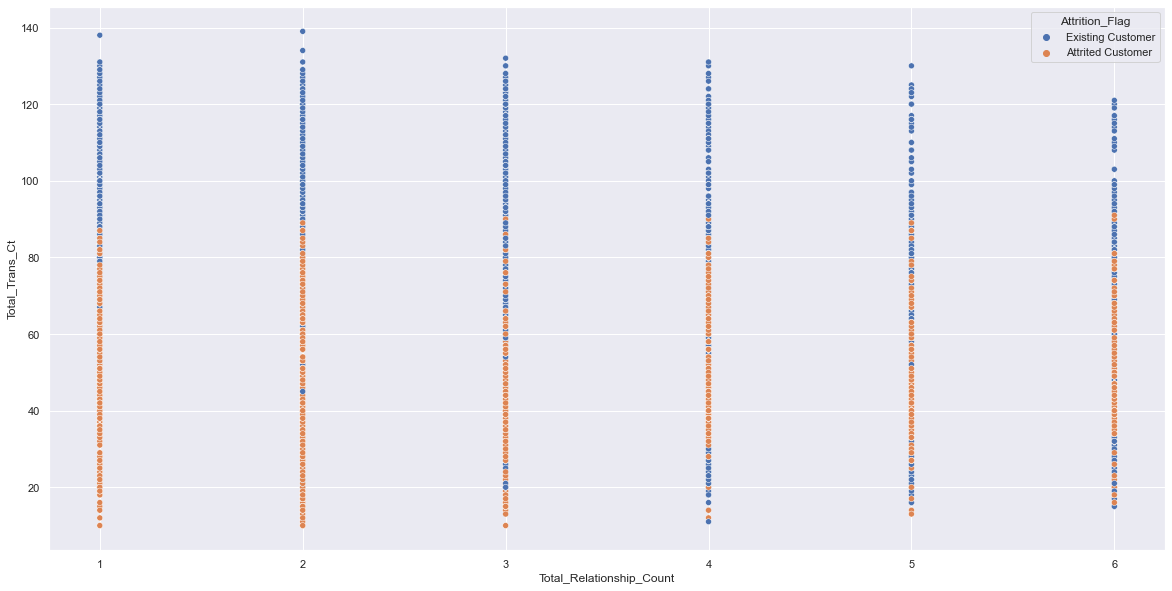

In [25]:
sns.scatterplot(x = 'Total_Relationship_Count',y = 'Total_Trans_Ct',hue = 'Attrition_Flag',data = df)

Customers who held only 1 or 2 products and a transaction count roughly less than 90 got churned more

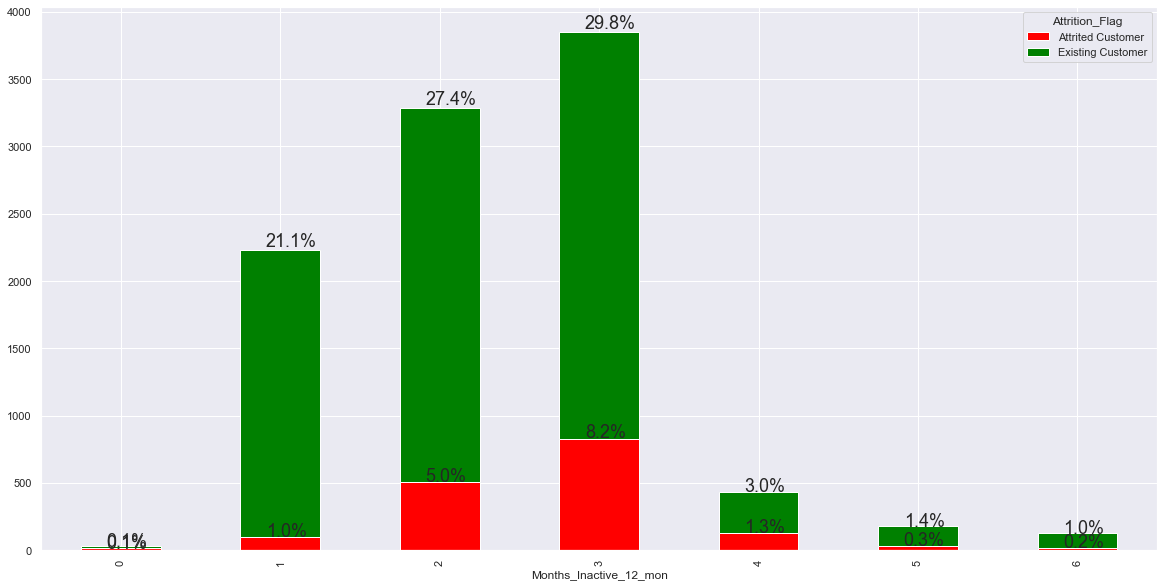

In [26]:
dfMonthsInactive = pd.crosstab(df['Months_Inactive_12_mon'],df['Attrition_Flag'])
totalMI = len(df['Months_Inactive_12_mon'])

ax6 = dfMonthsInactive.plot(kind = 'bar',stacked = True,color = ['red','green'],width = 0.5)

for p in ax6.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/totalMI)
    x = p.get_x() + p.get_width() / 2 - 0.09
    y = p.get_y() + p.get_height()*1.01 
    ax6.annotate(percentage, (x, y), size = 18)


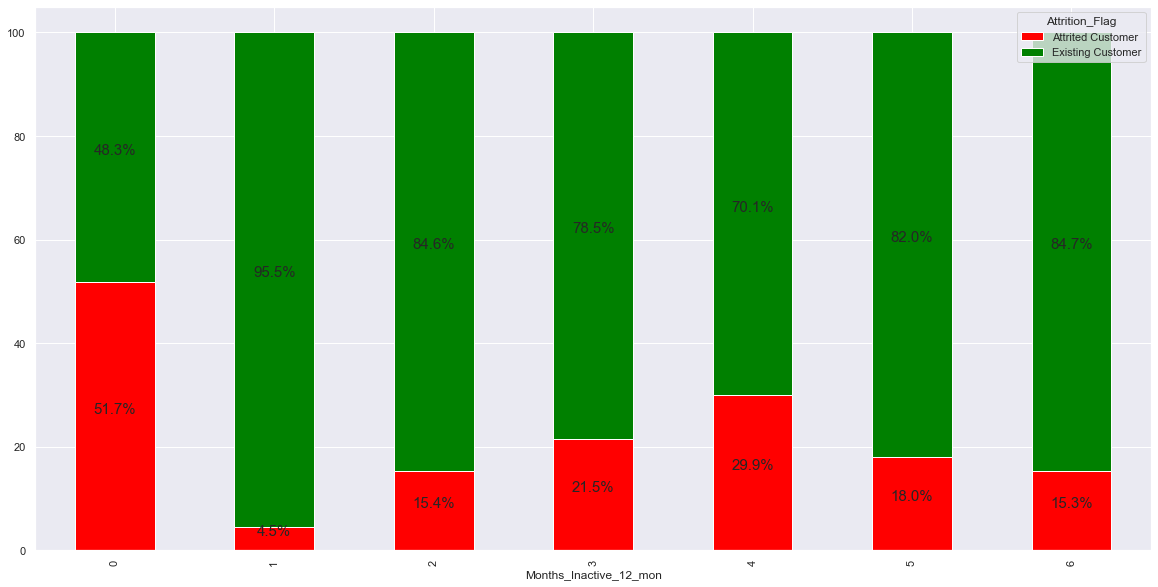

In [27]:
dfMonthsInactive = pd.crosstab(df['Months_Inactive_12_mon'],df['Attrition_Flag']).apply(lambda r:r/r.sum()*100,axis=1)
ax6 = dfMonthsInactive.plot(kind = 'bar',stacked = True,color = ['red','green'],width = 0.5)
for p in ax6.patches:
    height = p.get_height()
    ax6.text(p.get_x() + p.get_width() / 2, 
              p.get_y() + height / 2,
              "{:.1f}%".format(height),
              ha='center', 
              va='bottom',
               fontsize = 15)

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Total_Trans_Ct'>

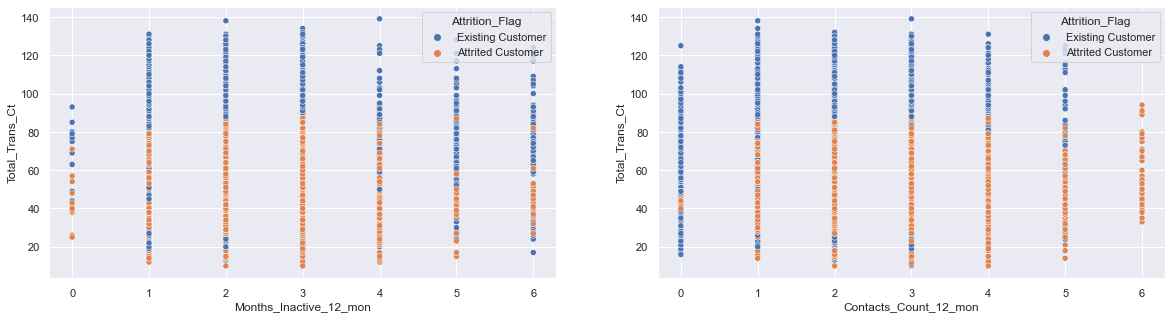

In [28]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (20,5))
sns.scatterplot(x = 'Months_Inactive_12_mon',y = 'Total_Trans_Ct',hue = 'Attrition_Flag',data = df,ax = ax1)
sns.scatterplot(x = 'Contacts_Count_12_mon',y = 'Total_Trans_Ct',hue = 'Attrition_Flag',data = df,ax = ax2)
# sns.scatterplot(x = 'Credit_Limit',y = 'Total_Trans_Ct',hue = 'Attrition_Flag',data = df,ax = ax3)

 - 8.2% of the total customers were churned after 3 months of inactivity
 - Most of the customers approximately 13%, were churned at 2nd and 3rd month of inactivity in the past 12 months with the total transaction count ranging roughly between 10 to 90
 - Almost all the customers got churned after 5 contacts in the past 12 months, possibly due to problems in using the credit card as the transaction count decreased after 4 contacts.


<AxesSubplot:xlabel='Credit_Limit', ylabel='Total_Trans_Amt'>

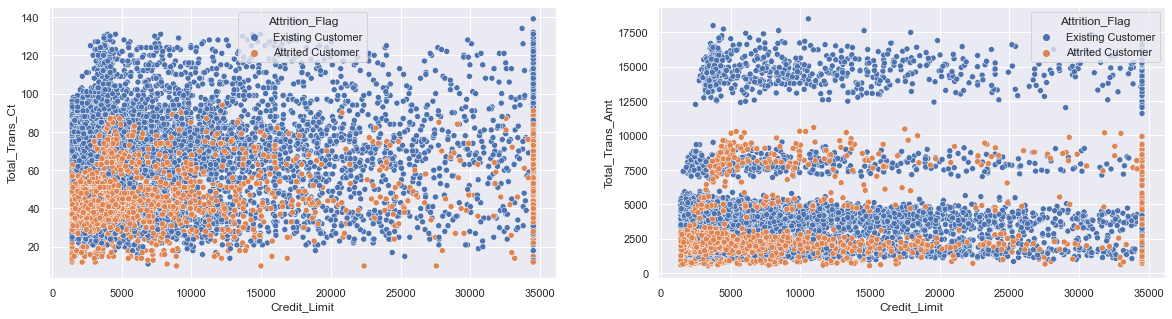

In [29]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize = (20,5))
sns.scatterplot(x = 'Credit_Limit',y = 'Total_Trans_Ct',hue = 'Attrition_Flag',data = df,ax = ax1)
sns.scatterplot(x = 'Credit_Limit',y = 'Total_Trans_Amt',hue = 'Attrition_Flag',data = df,ax = ax2)
# sns.scatterplot(x = 'Total_Trans_Ct',y = 'Total_Trans_Amt',hue = 'Attrition_Flag',data = df,ax = ax3)

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

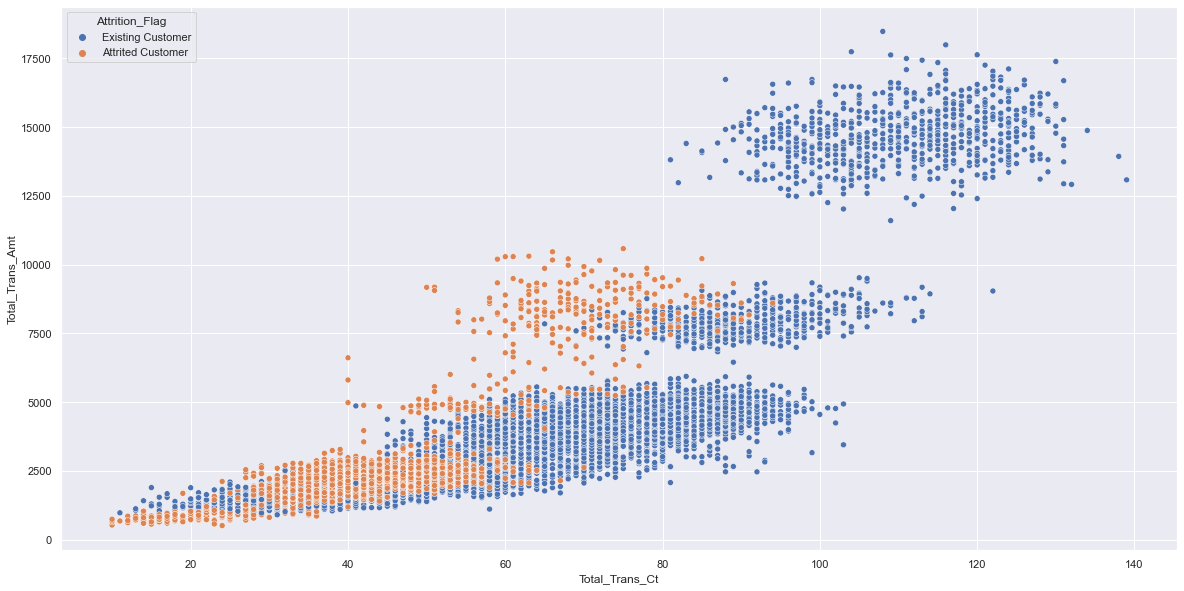

In [30]:
fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(x = 'Total_Trans_Ct',y = 'Total_Trans_Amt',hue = 'Attrition_Flag',data = df,ax = ax)

 - Customers with credit limit upto 15000 and a relatively low transaction count were churned.
 - Customers who transacted more than 12500 remained with the bank
 - Customers who used their credit cards atleast 30 to 50 times with a total transaction amount of roughly 3000 were churned
 - Customers who used their cards more than 80 times remained with the bank 

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

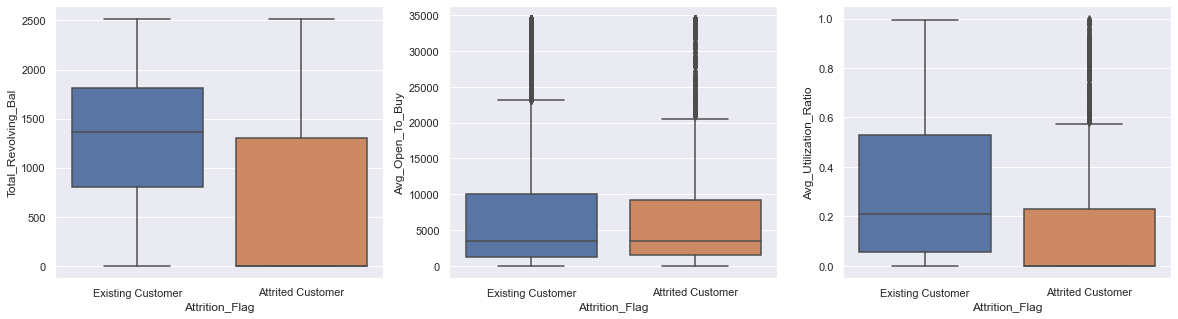

In [31]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3,figsize = (20,5))

sns.boxplot(x = 'Attrition_Flag', y = 'Total_Revolving_Bal',data = df,ax = ax1)
sns.boxplot(x = 'Attrition_Flag', y = 'Avg_Open_To_Buy',data = df,ax = ax2)
sns.boxplot(x = 'Attrition_Flag', y = 'Avg_Utilization_Ratio',data = df,ax = ax3)

In [32]:
# Outliers were observed in Average Open to Buy.

In [33]:
# dfOpenToBuy = df['Avg_Open_To_Buy']
Q1 = df['Avg_Open_To_Buy'].quantile(q = .25)
Q3 = df['Avg_Open_To_Buy'].quantile(q = .75)
IQR = Q3-Q1

LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)

totalOutliers = LB+UB
print('{},{},{},{},{},{}'.format(Q1,Q3,IQR,LB,UB,totalOutliers))

dfOpenToBuy = df[df['Avg_Open_To_Buy']<UB]
dfOpenToBuy.shape

# dataframe_raw_noOutliers = np.logical_or(dataframe_raw_new[(dataframe_raw_new > lower)],dataframe_raw_new[dataframe_raw_new < upper]) 
# dataframe_raw_noOutliers.count()

1324.5,9859.0,8534.5,-11477.25,22660.75,11183.5


(9164, 21)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

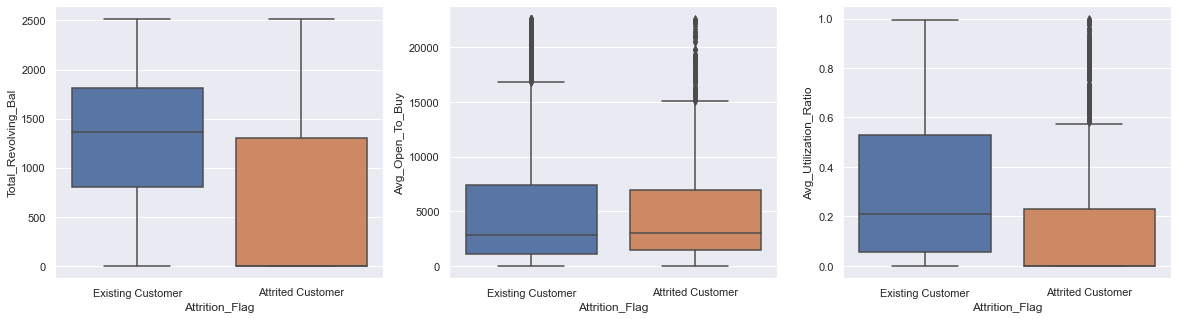

In [34]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3,figsize = (20,5))

sns.boxplot(x = 'Attrition_Flag', y = 'Total_Revolving_Bal',data = df,ax = ax1)
sns.boxplot(x = 'Attrition_Flag', y = 'Avg_Open_To_Buy',data = dfOpenToBuy,ax = ax2)
sns.boxplot(x = 'Attrition_Flag', y = 'Avg_Utilization_Ratio',data = df,ax = ax3)

 - After reducing the number of outliers, there is not much of a difference between the existing and churned customers' average open to buy.
 - The churned customers were more likely to have 0 revolving balance and average utilization ratio.
 - The churned customers might not have used their credit cards and lead them to cancel their service.

In [35]:
# dfOpenToBuy = df['Avg_Open_To_Buy']
Q1 = dfOpenToBuy['Avg_Open_To_Buy'].quantile(q = .25)
Q3 = dfOpenToBuy['Avg_Open_To_Buy'].quantile(q = .75)
IQR = Q3-Q1

LB = Q1-(1.5*IQR)
UB = Q3+(1.5*IQR)

totalOutliers = LB+UB
print('{},{},{},{},{},{}'.format(Q1,Q3,IQR,LB,UB,totalOutliers))

dfOpenToBuy = dfOpenToBuy[dfOpenToBuy['Avg_Open_To_Buy']<UB]
dfOpenToBuy.shape

# dataframe_raw_noOutliers = np.logical_or(dataframe_raw_new[(dataframe_raw_new > lower)],dataframe_raw_new[dataframe_raw_new < upper]) 
# dataframe_raw_noOutliers.count()

1155.0,7289.5,6134.5,-8046.75,16491.25,8444.5


(8632, 21)

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

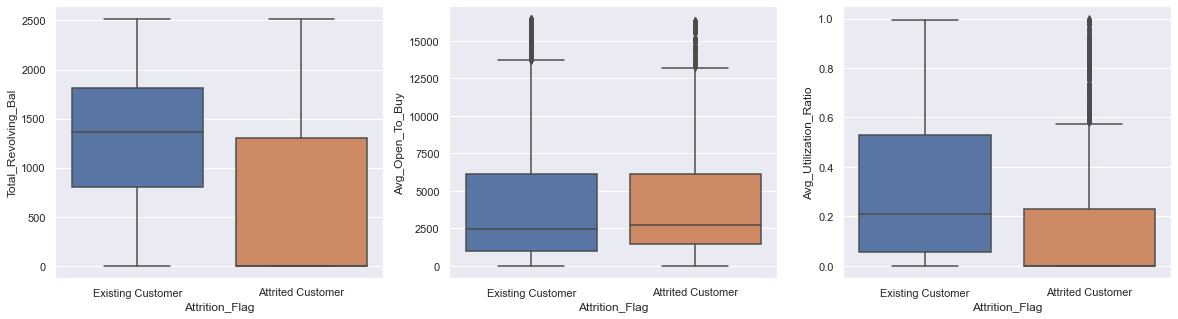

In [36]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3,figsize = (20,5))

sns.boxplot(x = 'Attrition_Flag', y = 'Total_Revolving_Bal',data = df,ax = ax1)
sns.boxplot(x = 'Attrition_Flag', y = 'Avg_Open_To_Buy',data = dfOpenToBuy,ax = ax2)
sns.boxplot(x = 'Attrition_Flag', y = 'Avg_Utilization_Ratio',data = df,ax = ax3)

- Null hypothesis: No significant effect by the average open to buy credit line on the attrition.
- Alternate hypothesis: There is a significant effect by the average open to buy credit line on attrition. 

In [37]:
import scipy.stats as stats

stats.f_oneway(df['Avg_Open_To_Buy'][df['Attrition_Flag'] == 'Existing Customer'],
              df['Avg_Open_To_Buy'][df['Attrition_Flag'] == 'Attrited Customer'])

F_onewayResult(statistic=0.0008228504895646762, pvalue=0.9771160894377175)

The f-test score has a very low value (<0.05) with a P-value of 0.97, hence we shall not reject the null hypothesis to conclude no significant effect on attrition by average open to buy credit line

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Total_Trans_Ct'>

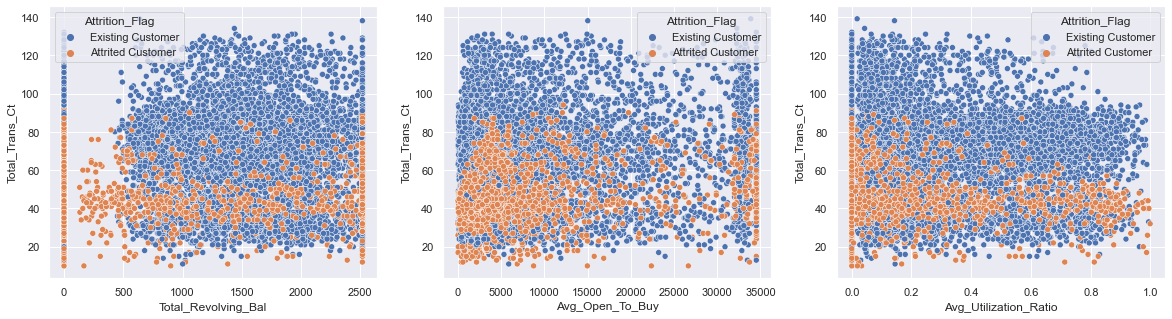

In [38]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize = (20,5))
sns.scatterplot(x = 'Total_Revolving_Bal',y = 'Total_Trans_Ct',hue = 'Attrition_Flag',data = df,ax = ax1)
sns.scatterplot(x = 'Avg_Open_To_Buy',y = 'Total_Trans_Ct',hue = 'Attrition_Flag',data = df,ax = ax2)
sns.scatterplot(x = 'Avg_Utilization_Ratio',y = 'Total_Trans_Ct',hue = 'Attrition_Flag',data = df,ax = ax3)

In [39]:
# Converting categorial variables into integers

In [40]:
df_attrition = pd.get_dummies(data = df['Attrition_Flag'],drop_first = True)
df_attrition.head() #Existing customer ->1 Attrited Customer -> 0
df= pd.concat([df,df_attrition],axis = 1)
df.head()
df.drop(['Attrition_Flag'],axis = 1,inplace = True)

In [41]:
df_Gender = pd.get_dummies(data = df['Gender'],drop_first = True) #m->1,f->0
df = pd.concat([df,df_Gender],axis = 1)
df.drop(['Gender'],axis =1,inplace = True)
df.replace(
    to_replace = ['Graduate','High School','Unknown','Uneducated','College','Post-Graduate','Doctorate'],
    value = [0,1,2,3,4,5,6],
    inplace = True)
df.replace(
    to_replace = ['Married','Single','Unknown','Divorced'],
    value = [0,1,2,3],
    inplace = True)
df.replace(
    to_replace = ['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'],
    value = [0,1,2,3,4,5],
    inplace = True)
df.replace(
    to_replace = ['Blue','Silver','Gold','Platinum'],
    value = [0,1,2,3],
    inplace = True)

# Correlation between variables

<AxesSubplot:>

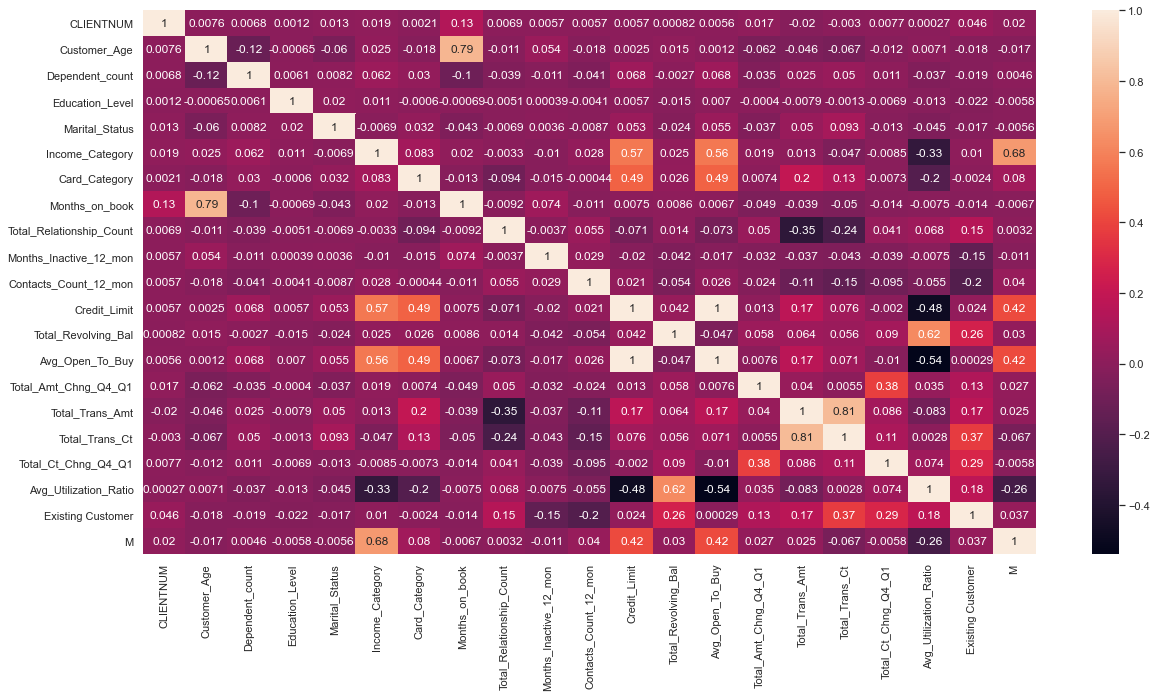

In [42]:
df_corr = df.corr()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_corr,annot = True)

- The months of relationship with the bank increases as the customer gets older 
- As the credit limit goes higher, the average utilization ratio gets lower.
- Credit card categories such as blue,platinum, etc highly depended on one's income. Higher the credit card category, higher the credit limit.

## Seperating the majority and minority class

In [43]:
class_0 = df[df['Existing Customer'] == 0]
class_1 = df[df['Existing Customer'] == 1]

In [44]:
pd.to_numeric(df['Existing Customer'])

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Existing Customer, Length: 10127, dtype: uint8

### Segregating dependent and independent features and dropping unnecessary features

In [46]:
X = df.drop(['Existing Customer','CLIENTNUM','Customer_Age','Education_Level','Dependent_count','Marital_Status','Income_Category','Card_Category','Months_on_book','Credit_Limit','Avg_Open_To_Buy','Avg_Utilization_Ratio','M'],axis = 1)
y = df['Existing Customer']

### To balance the imbalance in the categorical variable, we'll be using Random OverSampling

In [47]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 123)

In [48]:
x_ros,y_ros = ros.fit_resample(X,y)
print("Original class shape {},{}".format(X.shape,y.shape))
print("After resampling {},{}".format(x_ros.shape,y_ros.shape))

Original class shape (10127, 8),(10127,)
After resampling (17000, 8),(17000,)


# Logit model implementation

In [49]:
import statsmodels.api as sm
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

xTrain,xTest,yTrain,yTest = tts(x_ros,y_ros,test_size = 0.2,random_state = 1)



In [50]:
logit_train = sm.Logit(yTrain,xTrain).fit(maxiter = 1000)

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


/Users/premmadhavan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/premmadhavan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [51]:
print(logit_train.summary())

                           Logit Regression Results                           
Dep. Variable:      Existing Customer   No. Observations:                13600
Model:                          Logit   Df Residuals:                    13592
Method:                           MLE   Df Model:                            7
Date:                Sat, 05 Jun 2021   Pseudo R-squ.:                     inf
Time:                        21:06:37   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Total_Relationship_Count     0.1204      0.015      8.182      0.000       0.092       0.149
Months_Inactive_12_mon      -0.8970      0.024    -36.629      0.000      -0.945      -0.

/Users/premmadhavan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/premmadhavan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [52]:
print(logit_train.summary2())

                             Results: Logit
Model:                   Logit                Pseudo R-squared:    inf   
Dependent Variable:      Existing Customer    AIC:                 inf   
Date:                    2021-06-05 21:06     BIC:                 inf   
No. Observations:        13600                Log-Likelihood:      -inf  
Df Model:                7                    LL-Null:             0.0000
Df Residuals:            13592                LLR p-value:         1.0000
Converged:               1.0000               Scale:               1.0000
No. Iterations:          7.0000                                          
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Total_Relationship_Count  0.1204   0.0147   8.1815 0.0000  0.0915  0.1492
Months_Inactive_12_mon   -0.8970   0.0245 -36.6288 0.0000 -0.9450 -0

In [53]:
# Predicting

In [54]:
logReg = LogisticRegression()
result = logReg.fit(xTrain,yTrain)

/Users/premmadhavan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
ypred = result.predict(xTest)

In [56]:
# Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(yTest,ypred) 
print(cm)

[[1383  339]
 [ 289 1389]]


FalseNegatives(Type2 error) = 339

FalsePositives(Type1 error) = 289

In [58]:
precision = 1383/(1383 + 289)
print("Precision: {}%".format(round(precision*100),2))

Precision: 83%


In [59]:
result.intercept_

array([-0.92584607])

In [60]:
logodds = result.coef_[0]
pd.DataFrame(logodds,xTrain.columns,columns = ['coef']).sort_values(by = 'coef',ascending = False)

,coef
Total_Ct_Chng_Q4_Q1,0.438394
Total_Relationship_Count,0.161592
Total_Trans_Ct,0.096834
Total_Revolving_Bal,0.000670
Total_Trans_Amt,-0.000412
Total_Amt_Chng_Q4_Q1,-0.183009
Contacts_Count_12_mon,-0.577046
Months_Inactive_12_mon,-1.061710


In [61]:
num = 2.7 ** (result.intercept_ +(0.4*0.1))
den = 1+num
prob = num/den
print(prob)

[0.2932051]


 - The probability of the event to occur increases by 31.8% for unit increase in Total Relationship count
 - The probability of the event to occur increases by 37.9% for unit increase in Total count change from Q1 to Q4
 - For every one-unit increase in Total relationship count, the odds that the customer churned  are 0.16 times as large as the odds that the customer is not churned when all other variables are held constant.


In [63]:
result.predict_proba(xTest)

array([[0.07803157, 0.92196843],
       [0.85125088, 0.14874912],
       [0.9025536 , 0.0974464 ],
       ...,
       [0.03078779, 0.96921221],
       [0.23866122, 0.76133878],
       [0.88438826, 0.11561174]])